In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import os
import random

In [ ]:
def draw_rect(img, x1, y1, x2, y2, c):
    h, w, _ = img.shape
    min_x1 = max(0, x1 - 1)
    max_x1 = min(w, x1 + 1)
    min_x2 = max(0, x2 - 1)
    max_x2 = min(w, x2 + 1)
    min_y1 = max(0, y1 - 1)
    max_y1 = min(h, y1 + 1)
    min_y2 = max(0, y2 - 1)
    max_y2 = min(h, y2 + 1)
    img[y1:y2, min_x1:max_x1, :] = c
    img[y1:y2, min_x2:max_x2, :] = c
    img[min_y1:max_y1, x1:x2, :] = c
    img[min_y2:max_y2, x1:x2, :] = c

In [19]:
# Set this to you actual COCO path
coco_prefix = "./mscoco/train2017/"

In [21]:
# train2017.txt, val2017.txt, test2017.txt or unlabeled2017.txt depending on COCO part

labels = "./train2017.txt"

labels_by_file = {}
with open(labels, "r") as f:
    for line in f:
        filename, x1, y1, x2, y2 = line.replace("\n", "").split(" ")
        x1, y1, x2, y2 = float(x1), float(y1), float(x2), float(y2)
        if not filename in labels_by_file:
            labels_by_file[filename] = []
        labels_by_file[filename].append((x1, y1, x2, y2))

In [22]:
random_file = random.choice(list(labels_by_file.keys()))
print("File: {0}".format(random_file))
img = cv2.cv2.imread(os.path.join(coco_prefix, random_file))
img = img[:,:,::-1]

h, w, _ = img.shape

for label in labels_by_file[random_file]:
    x1, y1, x2, y2 = label
    x1 = int(x1*w)
    x2 = int(x2*w)
    y1 = int(y1*h)
    y2 = int(y2*h)
    if x1 >= w:
        x1 = w - 1
    if x2 >= w:
        x2 = w - 1
    if y1 >= h:
        y1 = h - 1
    if y2 >= h:
        y2 = h - 1
    
    color = (0,0,255)
    draw_rect(img, x1, y1, x2, y2, color)

File: 000000380516.jpg


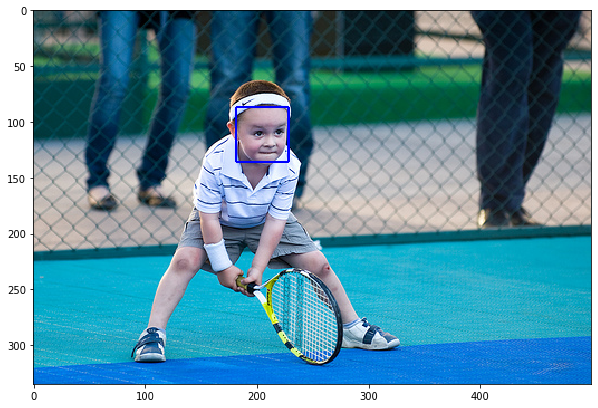

In [23]:
fig, ax = plt.subplots(figsize=(10, 20))
ax.imshow(img)